<a href="https://colab.research.google.com/github/tejasvini2805/Fish-Disease-Detection_/blob/main/WUS_Fish_disease_detection_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install 7zip
!apt-get install p7zip-full

# Extract using 7zip
!7z x /content/SalmonScan.zip -o/content/SalmonScan/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   
ERROR: No more files
/content/SalmonScan.zip



System ERROR:
Unknown error -2147024872


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/SalmonScan.zip /content/drive/MyDrive/


cp: cannot stat '/content/SalmonScan.zip': No such file or directory


In [ ]:
!unzip /content/SalmonScan.zip '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented' -d /content/SalmonScan/


unzip:  cannot find or open /content/SalmonScan.zip, /content/SalmonScan.zip.zip or /content/SalmonScan.zip.ZIP.


In [ ]:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   30G   84G  26% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
/dev/sda1        92G   64G   28G  70% /kaggle/input
tmpfs           6.4G  460K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   12G  3.4G  78% /content/drive


Data Preprocessing

The input images were preprocessed to enhance their quality and suitability for further analysis. The following steps were taken:

Resizing 📏: All the images were resized to a uniform size of 600 pixels in width and 250 pixels in height to ensure compatibility with the learning algorithm.
Image Augmentation 📸: To overcome the small amount of images, various image augmentation techniques were applied to the input images. These included:
Horizontal Flip ↩️: The images were horizontally flipped to create additional samples.
Vertical Flip ⬆️: The images were vertically flipped to create additional samples.
Rotation 🔄: The images were rotated to create additional samples.
Cropping 🪓: A portion of the image was randomly cropped to create additional samples.
Gaussian Noise 🌌: Gaussian noise was added to the images to create additional samples.
Shearing 🌆: The images were sheared to create additional samples.
Contrast Adjustment (Gamma) ⚖️: The gamma correction was applied to the images to adjust their contrast.
Contrast Adjustment (Sigmoid) ⚖️: The sigmoid function was applied to the images to adjust their contrast.

In [ ]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

fresh_path = '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented/FreshFish'
infected_path = '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented/InfectedFish'

def load_and_preprocess_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [250,250])
    img = img / 255.0
    return img, label

fresh_paths = [os.path.join(fresh_path, f) for f in os.listdir(fresh_path)]
infected_paths = [os.path.join(infected_path, f) for f in os.listdir(infected_path)]

fresh_labels = [0] * len(fresh_paths)
infected_labels = [1] * len(infected_paths)

all_paths = fresh_paths + infected_paths
all_labels = fresh_labels + infected_labels

dataset = tf.data.Dataset.from_tensor_slices((all_paths, all_labels))

dataset = dataset.map(lambda x, y: load_and_preprocess_image(x, y))

dataset = dataset.shuffle(buffer_size=1000).batch(32)

train_size = int(0.8 * len(all_paths))
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

for images, labels in train_dataset.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")


Image batch shape: (32, 250, 250, 3)
Label batch shape: (32,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.InputLayer(input_shape=(250, 250, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      13,779,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,872,449 (52.92 MB)

 Trainable params: 13,872,449 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(
    train_dataset,
    epochs=4,
    validation_data=test_dataset
)


Epoch 1/4
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 321ms/step - accuracy: 0.6091 - loss: 1.6217
Epoch 2/4


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.8598 - loss: 0.3569
Epoch 3/4
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.8949 - loss: 0.2491
Epoch 4/4
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.9064 - loss: 0.2303


In [ ]:

test_dataset = dataset.skip(train_size)

In [ ]:

for images, labels in test_dataset.take(1):
    print(f"Test batch - Images: {images.shape}, Labels: {labels.shape}")


In [ ]:

num_batches = 0
for _ in test_dataset:
    num_batches += 1
print(f"Number of batches in test dataset: {num_batches}")


Number of batches in test dataset: 0


In [ ]:

for images, labels in test_dataset.take(1):
    test_loss, test_acc = model.evaluate(images, labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


In [ ]:
from sklearn.model_selection import train_test_split

train_paths, test_paths, train_labels, test_labels = train_test_split(all_paths, all_labels, test_size=0.2, random_state=42)

train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

train_dataset = train_dataset.map(lambda x, y: load_and_preprocess_image(x, y))
test_dataset = test_dataset.map(lambda x, y: load_and_preprocess_image(x, y))

train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32)
test_dataset = test_dataset.batch(32)

for images, labels in train_dataset.take(1):
    print(f"Train batch shape: {images.shape}")
    print(f"Train label batch shape: {labels.shape}")


Train batch shape: (32, 250, 250, 3)
Train label batch shape: (32,)


In [ ]:
print(f"Training paths: {len(train_paths)}")
print(f"Testing paths: {len(test_paths)}")


Training paths: 966
Testing paths: 242


In [ ]:

print(f"Total number of images: {len(all_paths)}")


Total number of images: 1208


In [ ]:

history = model.fit(
    train_dataset,
    epochs=4,
    validation_data=test_dataset
)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Test accuracy: {test_acc}")


Epoch 1/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 264ms/step - accuracy: 0.9558 - loss: 0.1358 - val_accuracy: 0.9711 - val_loss: 0.1082
Epoch 2/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9567 - loss: 0.1004 - val_accuracy: 0.9669 - val_loss: 0.1051
Epoch 3/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.9876 - loss: 0.0576 - val_accuracy: 0.9380 - val_loss: 0.1895
Epoch 4/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9634 - loss: 0.0978 - val_accuracy: 0.9380 - val_loss: 0.1687
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9422 - loss: 0.1456
Test accuracy: 0.9380165338516235


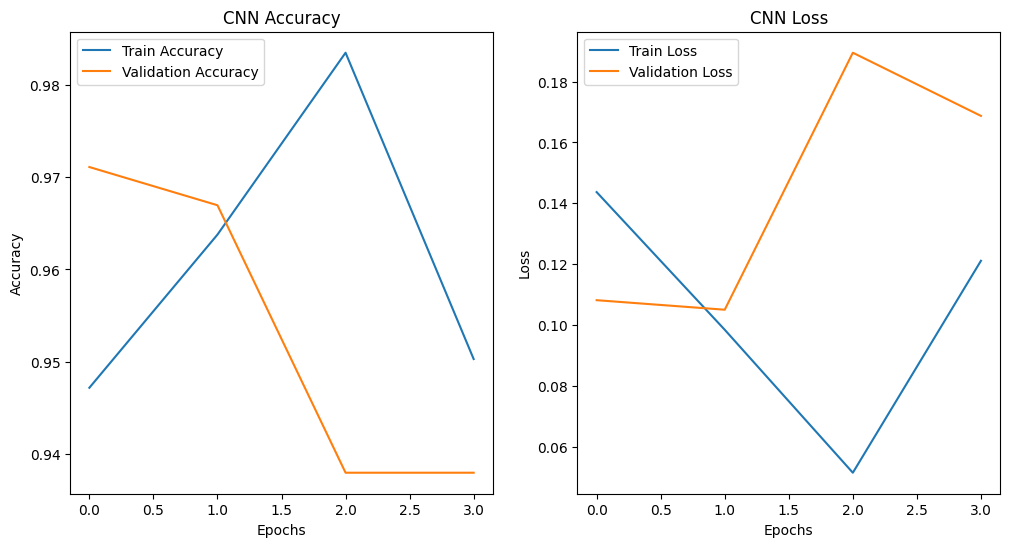

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Classification Report:

              precision    recall  f1-score   support

       Fresh       0.95      0.90      0.92       100
    Infected       0.93      0.96      0.95       142

    accuracy                           0.94       242
   macro avg       0.94      0.93      0.94       242
weighted avg       0.94      0.94      0.94       242

Confusion Matrix:

[[ 90  10]
 [  5 137]]


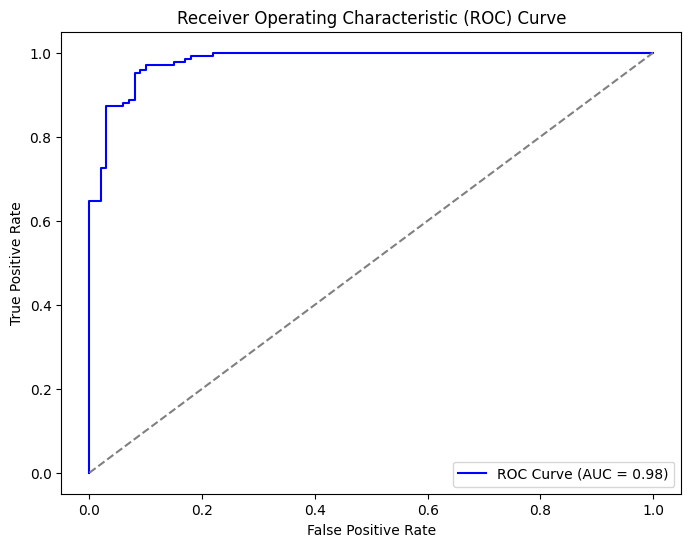

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot training history for CNN
plot_training_history(history, "CNN")

# Get predictions for evaluation metrics
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions)

# Convert predictions to binary (0 or 1) based on threshold
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_binary, target_names=['Fresh', 'Infected']))

# Confusion Matrix
print("Confusion Matrix:\n")
conf_matrix = confusion_matrix(y_true, y_pred_binary)
print(conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# **DENSE NET**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os

fresh_path = '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented/FreshFish'
infected_path = '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented/InfectedFish'

def load_and_preprocess_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [250, 600])
    img = img / 255.0
    return img, label

fresh_paths = [os.path.join(fresh_path, f) for f in os.listdir(fresh_path)]
infected_paths = [os.path.join(infected_path, f) for f in os.listdir(infected_path)]

fresh_labels = [0] * len(fresh_paths)
infected_labels = [1] * len(infected_paths)

all_paths = fresh_paths + infected_paths
all_labels = fresh_labels + infected_labels

dataset = tf.data.Dataset.from_tensor_slices((all_paths, all_labels))
dataset = dataset.map(lambda x, y: load_and_preprocess_image(x, y))

dataset = dataset.shuffle(buffer_size=1000)
train_size = int(0.8 * len(all_paths))
train_dataset = dataset.take(train_size).batch(32)
test_dataset = dataset.skip(train_size).batch(32)

def dense_block(x, growth_rate):
    bn = layers.BatchNormalization()(x)
    relu = layers.Activation('relu')(bn)
    conv = layers.Conv2D(growth_rate, (3, 3), padding='same')(relu)
    return layers.Concatenate()([x, conv])

inputs = layers.Input(shape=(250, 600, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2, 2))(x)

x = dense_block(x, growth_rate=32)
x = layers.MaxPooling2D((2, 2))(x)

x = dense_block(x, growth_rate=32)
x = layers.MaxPooling2D((2, 2))(x)

x = dense_block(x, growth_rate=32)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification

model1= models.Model(inputs, outputs)

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 250, 600, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 250, 600, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 125, 300, 32)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 125, 300, 32)   │            128 │ max_pooling2d[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 125, 300, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 125, 300, 32)   │          9,248 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 125, 300, 64)   │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 62, 150, 64)    │              0 │ concatenate[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 62, 150, 64)    │            256 │ max_pooling2d_1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 62, 150, 64)    │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 62, 150, 32)    │         18,464 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 62, 150, 96)    │              0 │ max_pooling2d_1[0][0], │
│ (Concatenate)             │                        │                │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 31, 75, 96)     │              0 │ concatenate_1[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 31, 75, 96)     │            384 │ max_pooling2d_2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 31, 75, 96)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)    

 Total params: 73,697 (287.88 KB)

 Trainable params: 73,313 (286.38 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:

history = model1.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset
)



Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 634ms/step - accuracy: 0.7272 - loss: 0.5540 - val_accuracy: 0.4050 - val_loss: 1.1900
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 409ms/step - accuracy: 0.8735 - loss: 0.3553 - val_accuracy: 0.4421 - val_loss: 0.8928
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 329ms/step - accuracy: 0.8707 - loss: 0.3305 - val_accuracy: 0.8347 - val_loss: 0.4588
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 376ms/step - accuracy: 0.8693 - loss: 0.3490 - val_accuracy: 0.7851 - val_loss: 0.4809
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 497ms/step - accuracy: 0.8888 - loss: 0.2895 - val_accuracy: 0.8636 - val_loss: 0.3545


In [ ]:

test_loss, test_accuracy = model1.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8211 - loss: 0.4274
Test Accuracy: 0.8181818127632141


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8289 - loss: 0.3878
Test Loss (DenseNet): 0.37772810459136963
Test Accuracy (DenseNet): 0.8429751992225647
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step

Classification Report (DenseNet):
              precision    recall  f1-score   support

       Fresh       0.88      0.65      0.75        91
    Infected       0.82      0.95      0.88       151

    accuracy                           0.83       242
   macro avg       0.85      0.80      0.81       242
weighted avg       0.84      0.83      0.83       242


Confusion Matrix (DenseNet):
[[ 59  32]
 [  8 143]]


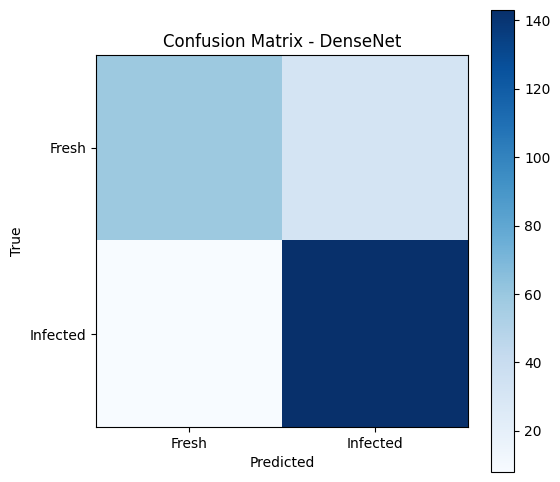

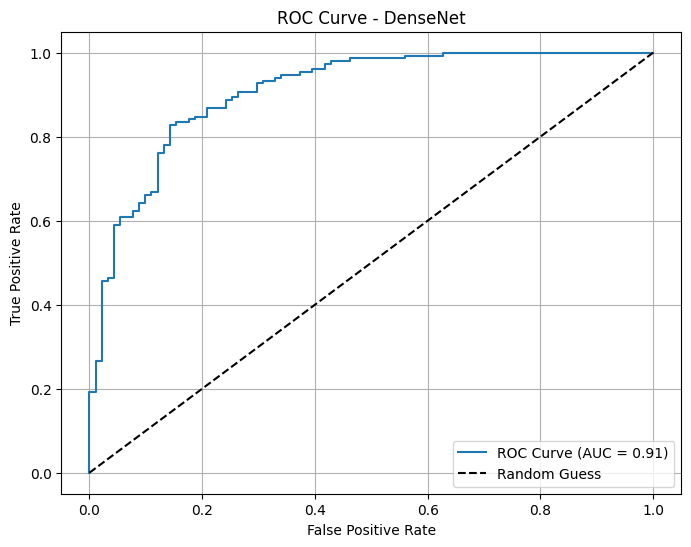

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

test_loss, test_accuracy = model1.evaluate(test_dataset)
print(f"Test Loss (DenseNet): {test_loss}")
print(f"Test Accuracy (DenseNet): {test_accuracy}")

y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model1.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions)

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
print("\nClassification Report (DenseNet):")
print(classification_report(y_true, y_pred_binary, target_names=["Fresh", "Infected"]))

conf_matrix = confusion_matrix(y_true, y_pred_binary)
print("\nConfusion Matrix (DenseNet):")
print(conf_matrix)

plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.title("Confusion Matrix - DenseNet")
plt.colorbar()
plt.xticks([0, 1], ["Fresh", "Infected"])
plt.yticks([0, 1], ["Fresh", "Infected"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve - DenseNet")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


# **RESNET**

In [ ]:
from tensorflow.keras import layers, models, optimizers

def resnet_block(input_tensor, filters, kernel_size=3, stride=1):
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if stride > 1 or input_tensor.shape[-1] != filters:
        input_tensor = layers.Conv2D(filters, 1, strides=stride, padding='same')(input_tensor)

    x = layers.Add()([x, input_tensor])
    x = layers.ReLU()(x)
    return x

inputs = layers.Input(shape=(250, 600, 3))

x = layers.Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

x = resnet_block(x, 64)
x = resnet_block(x, 128, stride=2)
x = resnet_block(x, 256, stride=2)
x = resnet_block(x, 512, stride=2)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model2= models.Model(inputs, outputs)

model2.compile(
    optimizer=optimizers.Adagrad(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 250, 600, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_82 (Conv2D)        │ (None, 125, 300, 64)   │          9,472 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_57    │ (None, 125, 300, 64)   │            256 │ conv2d_82[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_54 (ReLU)           │ (None, 125, 300, 64)   │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 63, 150, 64)    │              0 │ re_lu_54[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_83 (Conv2D)        │ (None, 63, 150, 64)    │         36,928 │ max_pooling2d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_58    │ (None, 63, 150, 64)    │            256 │ conv2d_83[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_55 (ReLU)           │ (None, 63, 150, 64)    │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_84 (Conv2D)        │ (None, 63, 150, 64)    │         36,928 │ re_lu_55[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_59    │ (None, 63, 150, 64)    │            256 │ conv2d_84[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_24 (Add)              │ (None, 63, 150, 64)    │              0 │ batch_normalization_5… │
│                           │                        │                │ max_pooling2d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_56 (ReLU)           │ (None, 63, 150, 64)    │              0 │ add_24[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_85 (Conv2D)        │ (None, 32, 75, 128)    │         73,856 │ re_lu_56[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_60    │ (None, 32, 75, 128)    │            512 │ conv2d_85[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_57 (ReLU)           │ (None, 32, 75, 128)    │              0 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_86 (Conv2D)        │ (None, 32, 75, 128)    │        147,584 │ re_lu_57[0][0]         │
├──────────────────────

 Total params: 4,976,641 (18.98 MB)

 Trainable params: 4,972,673 (18.97 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
history = model2.fit(
    train_dataset,
    epochs=7,
    validation_data=test_dataset

)

Epoch 1/7
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 758ms/step - accuracy: 0.7742 - loss: 0.4869 - val_accuracy: 0.3636 - val_loss: 0.7601
Epoch 2/7
31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 422ms/step - accuracy: 0.8744 - loss: 0.3331 - val_accuracy: 0.4504 - val_loss: 0.6536
Epoch 3/7
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 418ms/step - accuracy: 0.8836 - loss: 0.3100 - val_accuracy: 0.8347 - val_loss: 0.5442
Epoch 4/7
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 375ms/step - accuracy: 0.8824 - loss: 0.3344 - val_accuracy: 0.8264 - val_loss: 0.4915
Epoch 5/7
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 386ms/step - accuracy: 0.9134 - loss: 0.2683 - val_accuracy: 0.8719 - val_loss: 0.3897
Epoch 6/7
31/31 ━━━━━━━━━━━━━━━━━━━━ 18s 389ms/step - accuracy: 0.9070 - loss: 0.2476 - val_accuracy: 0.8926 - val_loss: 0.3497
Epoch 7/7
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 386ms/step - accuracy: 0.9297 - loss: 0.2110 - val_accuracy: 0.8471 - val_loss: 0.3950


In [ ]:

test_loss, test_accuracy = model2.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.8968 - loss: 0.3440
Test Accuracy: 0.8801652789115906


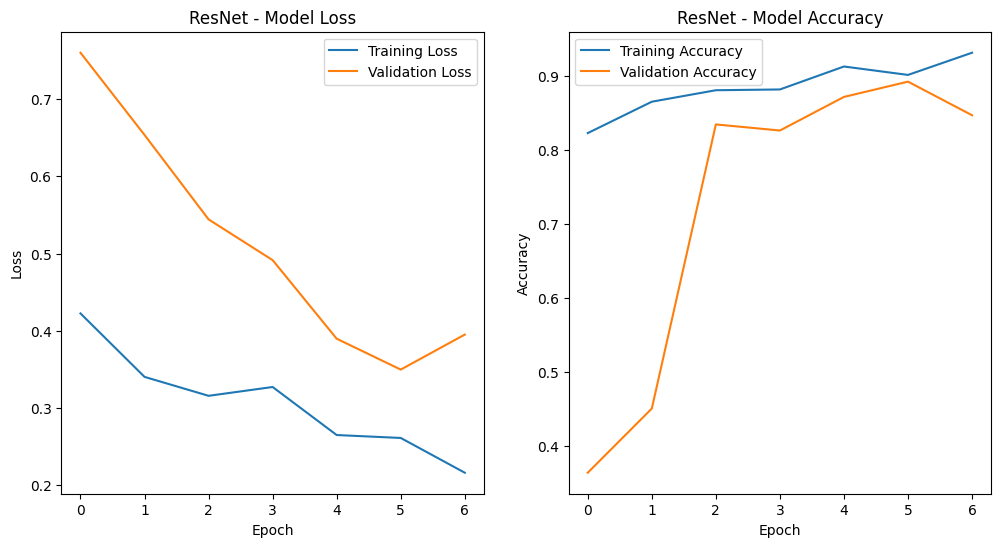

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


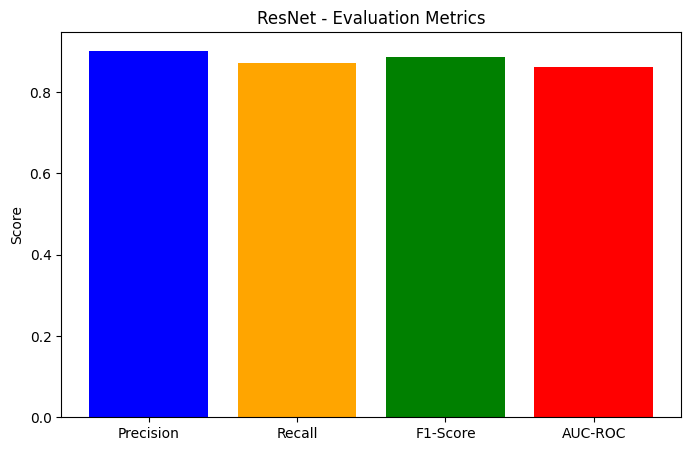

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score # Import necessary metrics


def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history, "ResNet")


def plot_metrics(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    metrics = {'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'AUC-ROC': roc_auc}

    plt.figure(figsize=(8, 5))
    plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
    plt.title(f'{model_name} - Evaluation Metrics')
    plt.ylabel('Score')
    plt.show()

y_true = []
y_pred = []
for images, labels in test_dataset:
    predictions = model2.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions)

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
plot_metrics(y_true, y_pred_binary, "ResNet")

In [ ]:
import tensorflow as tf
import os

fresh_path = '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented/FreshFish'
infected_path = '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented/InfectedFish'

fresh_paths = [os.path.join(fresh_path, f) for f in os.listdir(fresh_path)]
infected_paths = [os.path.join(infected_path, f) for f in os.listdir(infected_path)]
num_fresh = len(fresh_paths)
num_infected = len(infected_paths)

num_augmentations_needed = num_infected - num_fresh
print(f"Augmenting {num_augmentations_needed} 'fresh' images.")
image_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2),
])

augmented_fresh_images = []
for img_path in fresh_paths:
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [250, 600])
    img = img / 255.0

    for _ in range(num_augmentations_needed // num_fresh):
        augmented_img = image_augmentation(img)
        augmented_fresh_images.append(augmented_img)
new_fresh_images = fresh_paths + augmented_fresh_images

print(f"New total number of fresh images: {len(new_fresh_images)}")


Augmenting 296 'fresh' images.
New total number of fresh images: 456


In [ ]:
num_fresh = len(fresh_paths)
print(f"Total number of fresh images: {num_fresh}")
num_infected = len(infected_paths)
print(f"Total number of infected images: {num_infected}")

Total number of fresh images: 456
Total number of infected images: 752


#LeNet

In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split

# Paths to dataset
fresh_path = '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented/FreshFish'
infected_path = '/content/drive/MyDrive/SalmonScan/SalmonScan/Augmented/InfectedFish'
def load_and_preprocess_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img.set_shape([None, None, 3])
    img = tf.image.resize(img, [250, 600])
    img = tf.cast(img, tf.float32) / 255.0
    return img, label
fresh_paths = [os.path.join(fresh_path, f) for f in os.listdir(fresh_path) if f.endswith('.png')]
infected_paths = [os.path.join(infected_path, f) for f in os.listdir(infected_path) if f.endswith('.png')]
fresh_labels = [0] * len(fresh_paths)
infected_labels = [1] * len(infected_paths)
all_paths = fresh_paths + infected_paths
all_labels = fresh_labels + infected_labels

train_paths, test_paths, train_labels, test_labels = train_test_split(all_paths, all_labels, test_size=0.2, random_state=42)
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))
train_dataset = train_dataset.map(load_and_preprocess_image).shuffle(buffer_size=1000).batch(32)
test_dataset = test_dataset.map(load_and_preprocess_image).batch(32)

In [ ]:
model = models.Sequential([
    layers.InputLayer(input_shape=(250, 600, 3)),
    layers.Conv2D(6, (5, 5), activation='relu', padding='same'),
    layers.AvgPool2D((2, 2), strides=2, padding='valid'),
    layers.Conv2D(16, (5, 5), activation='relu', padding='valid'),
    layers.AvgPool2D((2, 2), strides=2, padding='valid'),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)                   │ (None, 250, 600, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 125, 300, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 121, 296, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 60, 148, 16)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 142080)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 120)                 │      17,049,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,062,841 (65.09 MB)

 Trainable params: 17,062,841 (65.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(
    train_dataset,
    epochs=4,
    validation_data=test_dataset
)
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

Epoch 1/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 24s 347ms/step - accuracy: 0.5335 - loss: 1.7247 - val_accuracy: 0.6983 - val_loss: 0.5257
Epoch 2/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 102ms/step - accuracy: 0.7574 - loss: 0.5265 - val_accuracy: 0.6116 - val_loss: 0.9569
Epoch 3/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.7689 - loss: 0.5172 - val_accuracy: 0.8636 - val_loss: 0.3479
Epoch 4/4
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9135 - loss: 0.2633 - val_accuracy: 0.8967 - val_loss: 0.3209
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.8835 - loss: 0.3309
Test accuracy: 0.8966942429542542


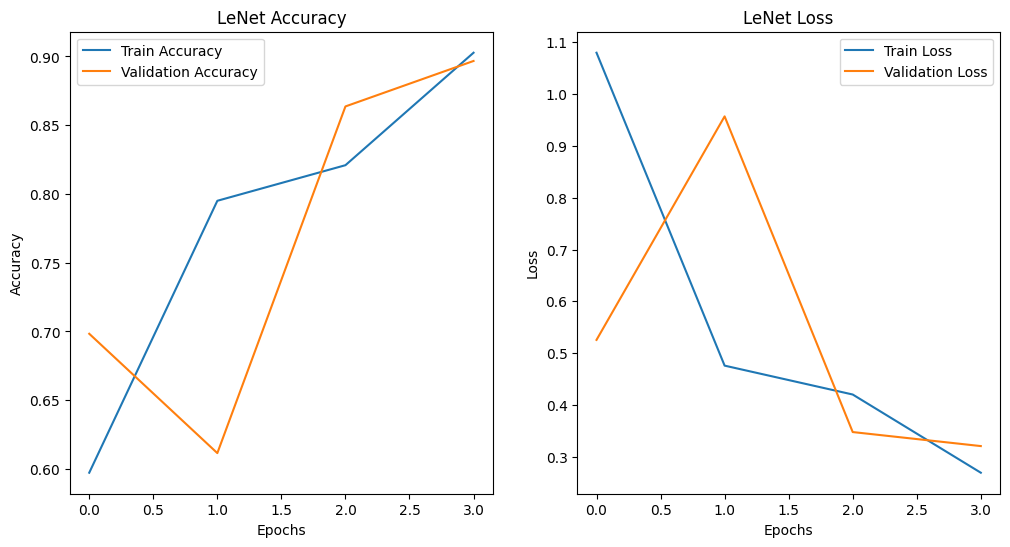

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
Classification Report:

              precision    recall  f1-score   support

       Fresh       0.99      0.76      0.86       100
    Infected       0.85      0.99      0.92       142

    accuracy                           0.90       242
   macro avg       0.92      0.88      0.89       242
weighted avg       0.91      0.90      0.89       242

Confusion Matrix:

[[ 76  24]
 [  1 141]]


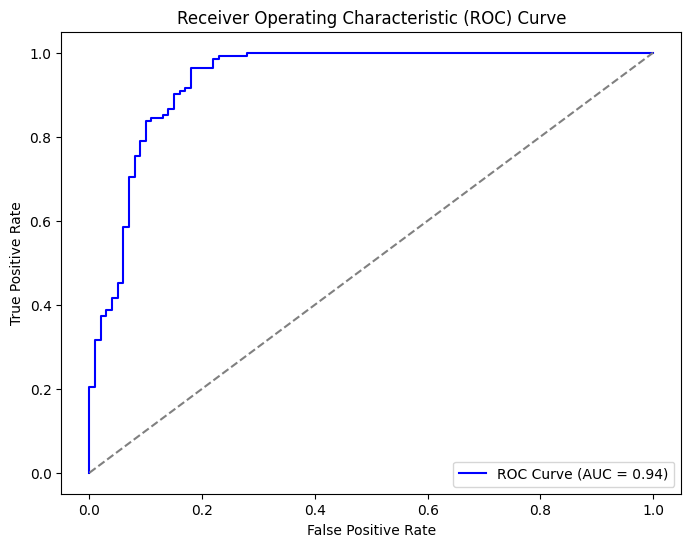

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history, "LeNet")
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
print("Classification Report:\n")
print(classification_report(y_true, y_pred_binary, target_names=['Fresh', 'Infected']))

print("Confusion Matrix:\n")
conf_matrix = confusion_matrix(y_true, y_pred_binary)
print(conf_matrix)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()